# WeatherPy
---
## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}units={units}&appid={weather_api_key}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
       
        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] 
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.fromtimestamp(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bogale
Processing Record 2 of Set 1 | jiwani
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | barra
Processing Record 6 of Set 1 | jaleshwar
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | lubang
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | panitian
Processing Record 12 of Set 1 | egilsstadir
Processing Record 13 of Set 1 | butte
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | benghazi
Processing Record 16 of Set 1 | iskateley
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | goure
Processing Record 23 of

Processing Record 39 of Set 4 | westport
Processing Record 40 of Set 4 | anadyr
Processing Record 41 of Set 4 | alenquer
Processing Record 42 of Set 4 | nicoya
Processing Record 43 of Set 4 | chinde
Processing Record 44 of Set 4 | seoni
Processing Record 45 of Set 4 | yangor
City not found. Skipping...
Processing Record 46 of Set 4 | mineral wells
Processing Record 47 of Set 4 | cuyamel
Processing Record 48 of Set 4 | alotau
City not found. Skipping...
Processing Record 49 of Set 4 | kepsut
Processing Record 0 of Set 5 | nar'yan-mar
Processing Record 1 of Set 5 | papao
Processing Record 2 of Set 5 | rio grande
Processing Record 3 of Set 5 | weno
Processing Record 4 of Set 5 | colonia
Processing Record 5 of Set 5 | jayapura
Processing Record 6 of Set 5 | antigonish
Processing Record 7 of Set 5 | dolores
Processing Record 8 of Set 5 | bardai
Processing Record 9 of Set 5 | cartagena del chaira
Processing Record 10 of Set 5 | genhe
Processing Record 11 of Set 5 | dullewala
Processing Recor

Processing Record 32 of Set 8 | as sulayyil
Processing Record 33 of Set 8 | kapa'a
Processing Record 34 of Set 8 | huaicheng
Processing Record 35 of Set 8 | yung shue wan
Processing Record 36 of Set 8 | tezu
Processing Record 37 of Set 8 | higuera de zaragoza
Processing Record 38 of Set 8 | mao
Processing Record 39 of Set 8 | lae
Processing Record 40 of Set 8 | saudarkrokur
Processing Record 41 of Set 8 | duba
Processing Record 42 of Set 8 | zhangjiakou shi xuanhua qu
Processing Record 43 of Set 8 | oualidia
City not found. Skipping...
Processing Record 44 of Set 8 | mandan
Processing Record 45 of Set 8 | lompoc
Processing Record 46 of Set 8 | ta`u
Processing Record 47 of Set 8 | nadi
Processing Record 48 of Set 8 | kataba
Processing Record 49 of Set 8 | mokrous
Processing Record 0 of Set 9 | conception bay south
Processing Record 1 of Set 9 | sabang
Processing Record 2 of Set 9 | el calafate
Processing Record 3 of Set 9 | pont rouge
Processing Record 4 of Set 9 | cooma
Processing Reco

Processing Record 21 of Set 12 | bandar labuan
Processing Record 22 of Set 12 | jiangyou
Processing Record 23 of Set 12 | brookings
Processing Record 24 of Set 12 | masjed soleyman
Processing Record 25 of Set 12 | okha
Processing Record 26 of Set 12 | ha tinh
Processing Record 27 of Set 12 | challapata
Processing Record 28 of Set 12 | tura
Processing Record 29 of Set 12 | sisimiut
Processing Record 30 of Set 12 | saint-philippe
Processing Record 31 of Set 12 | dryden
Processing Record 32 of Set 12 | chichen-itza
Processing Record 33 of Set 12 | pangody
Processing Record 34 of Set 12 | amursk
Processing Record 35 of Set 12 | krotoszyn
Processing Record 36 of Set 12 | fort bragg
Processing Record 37 of Set 12 | frenda
Processing Record 38 of Set 12 | liberal
Processing Record 39 of Set 12 | nephi
Processing Record 40 of Set 12 | mwaya
Processing Record 41 of Set 12 | fatehpur chaurasi
Processing Record 42 of Set 12 | gamba
Processing Record 43 of Set 12 | las lomitas
--------------------

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bogale,16.2833,95.4000,78.78,84,99,9.55,MM,2023-06-07 12:44:25
1,jiwani,25.0500,61.7417,91.45,56,5,11.45,PK,2023-06-07 12:44:26
2,port elizabeth,-33.9180,25.5701,59.31,85,0,17.27,ZA,2023-06-07 12:44:26
3,wailua homesteads,22.0669,-159.3780,75.99,89,40,8.05,US,2023-06-07 12:40:18
4,barra,-11.0894,-43.1417,88.30,35,18,3.94,BR,2023-06-07 12:44:26


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bogale,16.2833,95.4000,78.78,84,99,9.55,MM,2023-06-07 12:44:25
1,jiwani,25.0500,61.7417,91.45,56,5,11.45,PK,2023-06-07 12:44:26
2,port elizabeth,-33.9180,25.5701,59.31,85,0,17.27,ZA,2023-06-07 12:44:26
3,wailua homesteads,22.0669,-159.3780,75.99,89,40,8.05,US,2023-06-07 12:40:18
4,barra,-11.0894,-43.1417,88.30,35,18,3.94,BR,2023-06-07 12:44:26


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

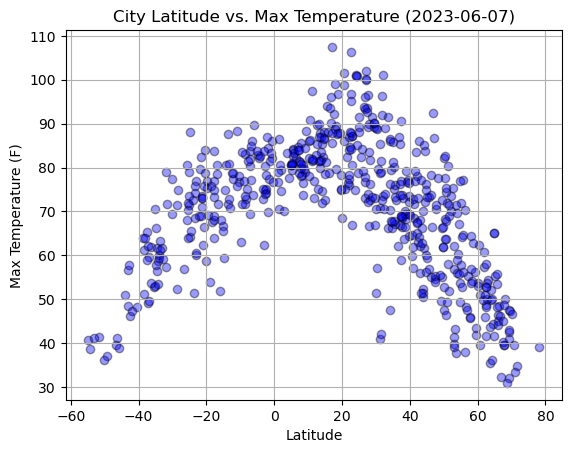

In [8]:
#grab current date for title
date = datetime.today().date()

# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values, y_values, facecolor="blue", edgecolor="black", alpha=0.4)
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

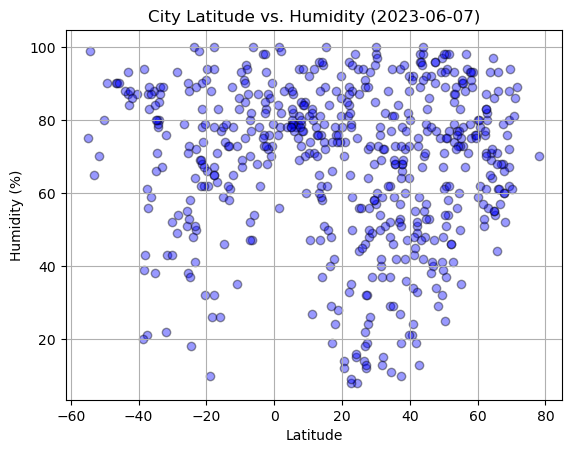

In [9]:
#grab current date for title
date = datetime.today().date()

# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values, facecolor="blue", edgecolor="black", alpha=0.4)
plt.grid()
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

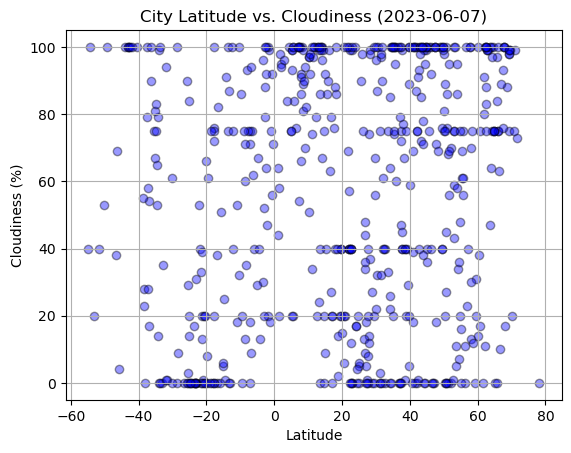

In [10]:
#grab current date for title
date = datetime.today().date()

# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values, facecolor="blue", edgecolor="black", alpha=0.4)
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

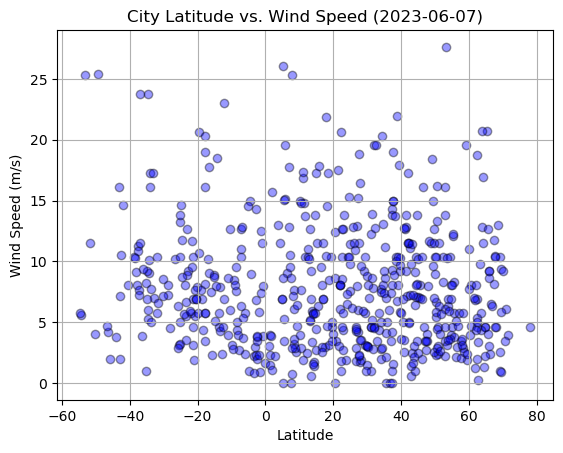

In [11]:
#grab current date for title
date = datetime.today().date()

# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values, facecolor="blue", edgecolor="black", alpha=0.4)
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
def lineregress(x_values, y_values, x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress = x_values * slope + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress, "r-")
    plt.xlabel("Latitude")
    plt.annotate(line,(x,y),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bogale,16.2833,95.4000,78.78,84,99,9.55,MM,2023-06-07 12:44:25
1,jiwani,25.0500,61.7417,91.45,56,5,11.45,PK,2023-06-07 12:44:26
3,wailua homesteads,22.0669,-159.3780,75.99,89,40,8.05,US,2023-06-07 12:40:18
5,jaleshwar,26.6471,85.8008,93.33,22,9,4.61,NP,2023-06-07 12:44:27
6,tiksi,71.6872,128.8694,34.79,89,73,3.94,RU,2023-06-07 12:44:27


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port elizabeth,-33.9180,25.5701,59.31,85,0,17.27,ZA,2023-06-07 12:44:26
4,barra,-11.0894,-43.1417,88.30,35,18,3.94,BR,2023-06-07 12:44:26
7,blackmans bay,-43.0167,147.3167,56.70,87,100,7.18,AU,2023-06-07 12:44:27
9,port-aux-francais,-49.3500,70.2167,36.99,90,100,25.43,TF,2023-06-07 12:44:28
17,puerto ayora,-0.7393,-90.3518,85.96,90,92,8.01,EC,2023-06-07 12:44:30


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5701464536721946


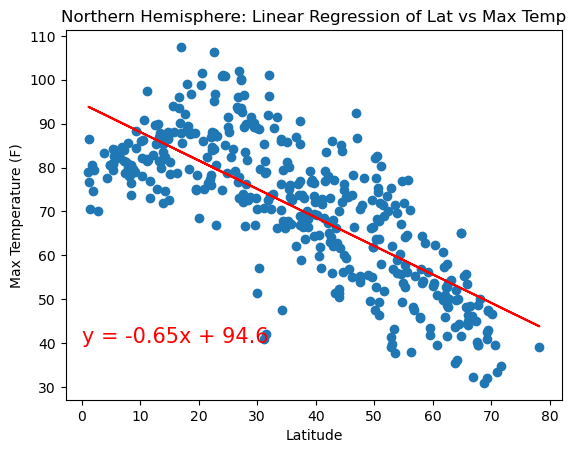

In [15]:
# Linear regression on Northern Hemisphere

#set up x and y values
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

#put in where you want the line equation to go
x = 0
y = 40

#plot the y label and title
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere: Linear Regression of Lat vs Max Temp")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress1.png")

The r-value is: 0.6327939965747773


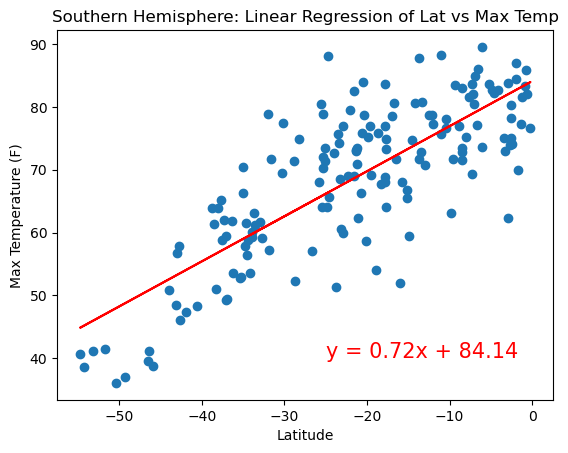

In [16]:
# Linear regression on Southern Hemisphere

#set up x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

#put in where you want the line equation to go
x = -25
y = 40

#plot the y label and title
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere: Linear Regression of Lat vs Max Temp")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress2.png")

**Discussion about the linear relationship:** These linear regressions are modeling the relationship between the Latitude and the Max Temperaure (f) in the Northern and Southern Hemisphere. The results reveal a strong correlation(southern hemisphere) and a moderate correlation(northern hemisphere) between the max temperature and latitude. The closer you get to the equator, the hotter it becomes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0003275248606628201


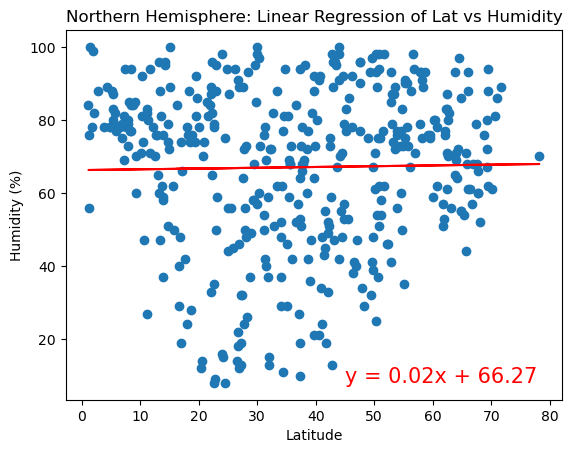

In [17]:
# Northern Hemisphere

#set up x and y values
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

#put in where you want the line equation to go
x = 45
y = 8

#plot the y label and title
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Linear Regression of Lat vs Humidity")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress3.png")

The r-value is: 0.0013814293702939986


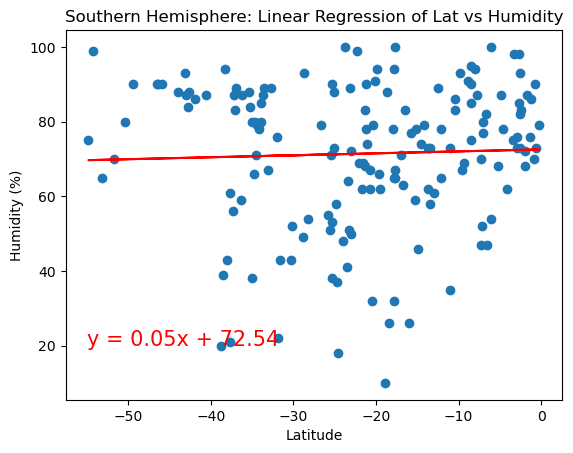

In [18]:
# Southern Hemisphere

#set up x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

#put in where you want the line equation to go
x = -55
y = 20

#plot the y label and title
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Linear Regression of Lat vs Humidity")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress4.png")


**Discussion about the linear relationship:** These linear regressions are modeling the relationship between the Latitude and the Humidity in the Northern and Southern Hemisphere. The results show almost no correlation (in both northern and southern) between the latitude of the city and the humidity percentage. For the Southern Hemisphere, it seems that near the latitudes (-35 : -10) is where the humidity will either stay high or lower. For the Northern Hemisphere, it seems that near the latitudes (10 : 65) is where the humidity will either stay high or lower.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 5.9585815396834044e-05


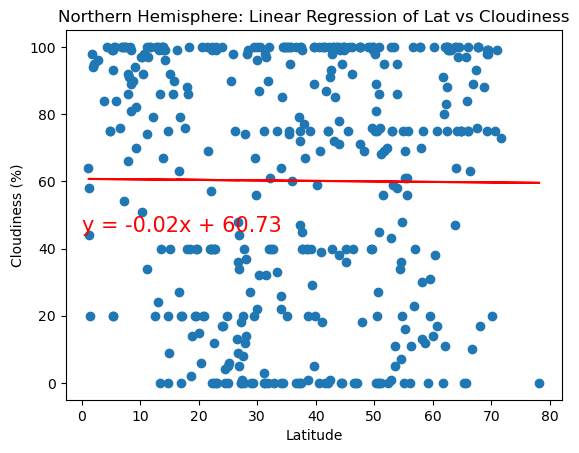

In [19]:
# Northern Hemisphere

#set up x and y values
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

#put in where you want the line equation to go
x = 0
y = 45

#plot the y label and title
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Linear Regression of Lat vs Cloudiness")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress5.png")

The r-value is: 0.00016993918884042642


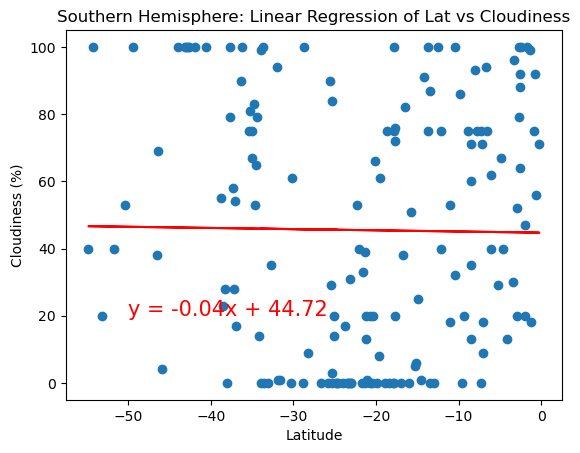

In [20]:
# Southern Hemisphere

#set up x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

#put in where you want the line equation to go
x = -50
y = 20

#plot the y label and title
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Linear Regression of Lat vs Cloudiness")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress6.png")

**Discussion about the linear relationship:** These linear regressions are modeling the relationship between the latitude and the cloudiness in the Northern and Southern Hemisphere. The results show almost no correlation (in both the northern and southern hemisphere) between the latitude and cloudiness percentage.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004747495422588319


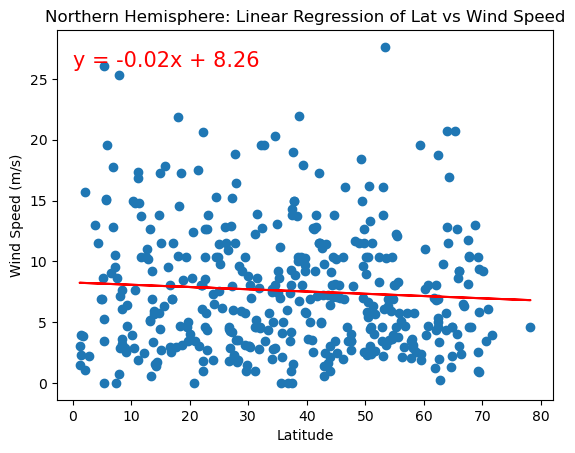

In [22]:
# Northern Hemisphere

#set up x and y values
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

#put in where you want the line equation to go
x = 0
y = 26

#plot the y label and title
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere: Linear Regression of Lat vs Wind Speed")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress7.png")

The r-value is: 0.05272672653809427


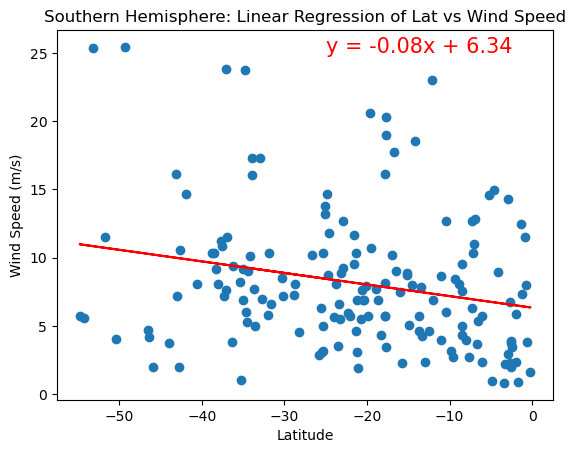

In [23]:
# Southern Hemisphere

#set up x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

#put in where you want the line equation to go
x = -25
y = 25

#plot the y label and title
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere: Linear Regression of Lat vs Wind Speed")

#add in the lineregress function from earlier
lineregress(x_values, y_values, x, y)

#save figure
plt.savefig("../output_data/LineRegress8.png")

**Discussion about the linear relationship:** These linear regression lines are modeling the relationship between the latitude and the wind speed in the Northern and Southern Hemisphere. These results show almost no correlation between the latitude and wind speed with the rvalue being about 0.01/0.02 for both graphs.